# Homework 1 #
## Gerald Jones
## Fall 2023
## Purpose: Implement the Forward and Reverse star graph algorithms
## Required: 
* ### <span style="color:red">Return the the pointer for where in the sorted edge lists the edges for node 27 would be found</span>

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt   # for graph visualization
import numpy as np                # Because habit

## Define some functions to get it all done

In [50]:
# set up some functions because that is how I do...
#############################################################################################################
############################### Graph making tools
## -- create a graph with networkx
def generateGraph(Graph: nx.Graph, nodes: list, edges: list):
    Graph.add_nodes_from(nodes)
    Graph.add_edges_from(edges)
    
## -- visualize a networkx graph with matplotlib
def showGraph(G, axisPosition, options, figsize=(30, 30), title="Test Graph", fontdict={"size":20}):
    plt.figure(figsize=figsize)
    subax = plt.subplot(axisPosition)
    subax.set_title(title, fontdict=fontdict)
    nx.draw(G, **options)
    
#############################################################################################################    
############################### Graph representation alogorithms

# -- performs the forward star algorithm to generate the sorted edge adjaceny list
def forwardStarG(N, edges, **kwargs):
    # set up list of index pointers using nans as 
    # sentinel values for no incoming edges
    pointers = list([np.nan]*N)

    # create sorted list of edges by the tails
    edges_sorted = sorted(edges, key=lambda x: x[0])
    node = np.inf    # initial node with place holder value
    node = 0
    oldIndex = None
    # for every edge in the list 
    # go through and look for the tail node to change
    # when found store the current incrment value which represents
    # the index into the edge list where a new nodes edges begin
    for index, edge in enumerate(edges_sorted):
        # when the tail node changes 
        # store the index where the new nodes edges start
        if edge[0] != node:
            node = edge[0]
            oldIndex = int(index)
            pointers[node] = int(index)
        else:
            pointers[index] = oldIndex
    return edges_sorted, list(pointers)


# -- performs the forward star algorithm to generate the sorted edge adjaceny list
def forwardStarGB(N, edges, **kwargs):
    # set up list of index pointers using nans as 
    # sentinel values for no incoming edges
    pointers = np.array(list([np.nan]*N))

    # create sorted list of edges by the tails
    edges_sorted = sorted(edges, key=lambda x: x[0])
    node = np.inf    # initial node with place holder value
    node = 0
    oldIndex = 0
    previousIndex = 0
    # for every edge in the list 
    # go through and look for the tail node to change
    # when found store the current incrment value which represents
    # the index into the edge list where a new nodes edges begin
    for index, edge in enumerate(edges_sorted):
        # when the tail node changes 
        # store the index where the new nodes edges start
        if edge[0] != node:
            node = edge[0]
            pointers[oldIndex:node] = int(previousIndex)
            pointers[node] = index
            oldIndex = int(node+1)  # store index where the node changed to remember where we need to start the adjustment
            previousIndex = index
#         else:
#             pointers[index] = oldIndex
    print(node)
    pointers[node + 1:] = pointers[node]
    return edges_sorted, list(pointers)



# -- performs the reverse star algorithm to generate the sorted edge adjaceny list
def reverseStarG(N, edges, **kwargs):
    # set up list of index pointers using nans as 
    # sentinel values for no incoming edges
    pointers = np.array(list([np.nan]*N))

    # create sorted list of edges by the heads
    edges_sorted = sorted(edges, key=lambda x: x[1])
    index = 0   
    node = np.inf    # initial node
    oldIndex = 0
    # for every edge in the list 
    # go through and look for the head node to change
    # when found store the current increment value which represents
    # the index into the edge list where a new nodes edges begin
    for index, edge in enumerate(edges_sorted):

        # when the tail node changes 
        # store the index where the new nodes edges start
        if edge[1] != node:
            node = edge[1]
            oldIndex = index
            pointers[node] = int(index)
        else:
            pointers[index] = oldIndex
    return edges_sorted, list(pointers)

# -- performs the reverse star algorithm to generate the sorted edge adjaceny list
def reverseStarGB(N, edges, **kwargs):
    # set up list of index pointers using nans as 
    # sentinel values for no incoming edges
    pointers = np.array(list([np.nan]*N))

    # create sorted list of edges by the tails
    edges_sorted = sorted(edges, key=lambda x: x[1])
    node = np.inf    # initial node with place holder value
    node = 0
    oldIndex = 0
    previousIndex = 0
    # for every edge in the list 
    # go through and look for the tail node to change
    # when found store the current incrment value which represents
    # the index into the edge list where a new nodes edges begin
    for index, edge in enumerate(edges_sorted):
        # when the tail node changes 
        # store the index where the new nodes edges start
        if edge[1] != node:
            node = edge[1]
            pointers[oldIndex:node] = int(previousIndex)
            pointers[node] = index
            oldIndex = int(node+1)  # store index where the node changed to remember where we need to start the adjustment
            previousIndex = index
#         else:
#             pointers[index] = oldIndex
    print(node)
    pointers[node + 1:] = pointers[node]
    return edges_sorted, list(pointers)

# -- tool to get a listing of a nodes edges based on the passed sorted edge list
# this method will return the edges for a given node based on the sorted edge list 
# the edge list itself depends on which algorithm was used to generate it
def getEdges(sorted_edges, pointers, Node):
    # use the node as a pointer into the list of edge list pointers
    # that indicate where in the sorted list the Nodes edges begin
    startIndex = pointers[Node]
    if np.isnan(startIndex):
        print("Node: {} has no edges found in the given sorted edge list")
        print("This indicates that what ever algorithm was used to generate the edge list") 
        print("determined that this node did not have those type of edges (incoming/outgoing)")
    # using the pointer list 
    # search for the next pointer/index value
    # do some quick maths to get how many edges this node actually has
    # by counting how many indices ahead in the list the next node that has 
    # edges is and then return the subset of edges based on this information
    for a in pointers[Node+1:]:
        # if we see a sentinel value keep it moving...
        if np.isnan(a):
            continue
        # otherwise we need to see how many indices into the pointer list we have moved 
        # which tells us how many edges this node has
        # with this we can pull this nodes edges from the edge list
        else:
            
            num_to_pull = a - pointers[Node]
            print(f"The number of edges for node {Node} is: {num_to_pull}")
            print(f"They are:\n{sorted_edges[startIndex:startIndex+num_to_pull]}")
            
            # return them for when we want to do something with them later
            return sorted_edges[startIndex:startIndex+num_to_pull]
    
    return 

# Set up the graph as described by original Notebook...

		The Edges to add to the graph:
[(5, 46), (18, 51), (39, 72), (37, 47), (76, 94), (35, 37), (40, 91), (52, 69), (28, 50), (59, 75), (17, 30), (10, 18), (61, 67), (37, 74), (57, 87), (35, 78), (29, 37), (30, 92), (40, 69), (2, 77), (4, 7), (53, 68), (66, 80), (50, 90), (44, 75), (52, 64), (32, 92), (3, 8), (54, 58), (5, 36), (65, 83), (32, 73), (2, 90), (13, 28), (59, 99), (1, 27), (55, 59), (39, 50), (20, 61), (53, 83), (43, 51), (5, 20), (39, 65), (82, 90), (15, 79), (42, 98), (18, 53), (52, 65), (24, 66), (36, 52)]


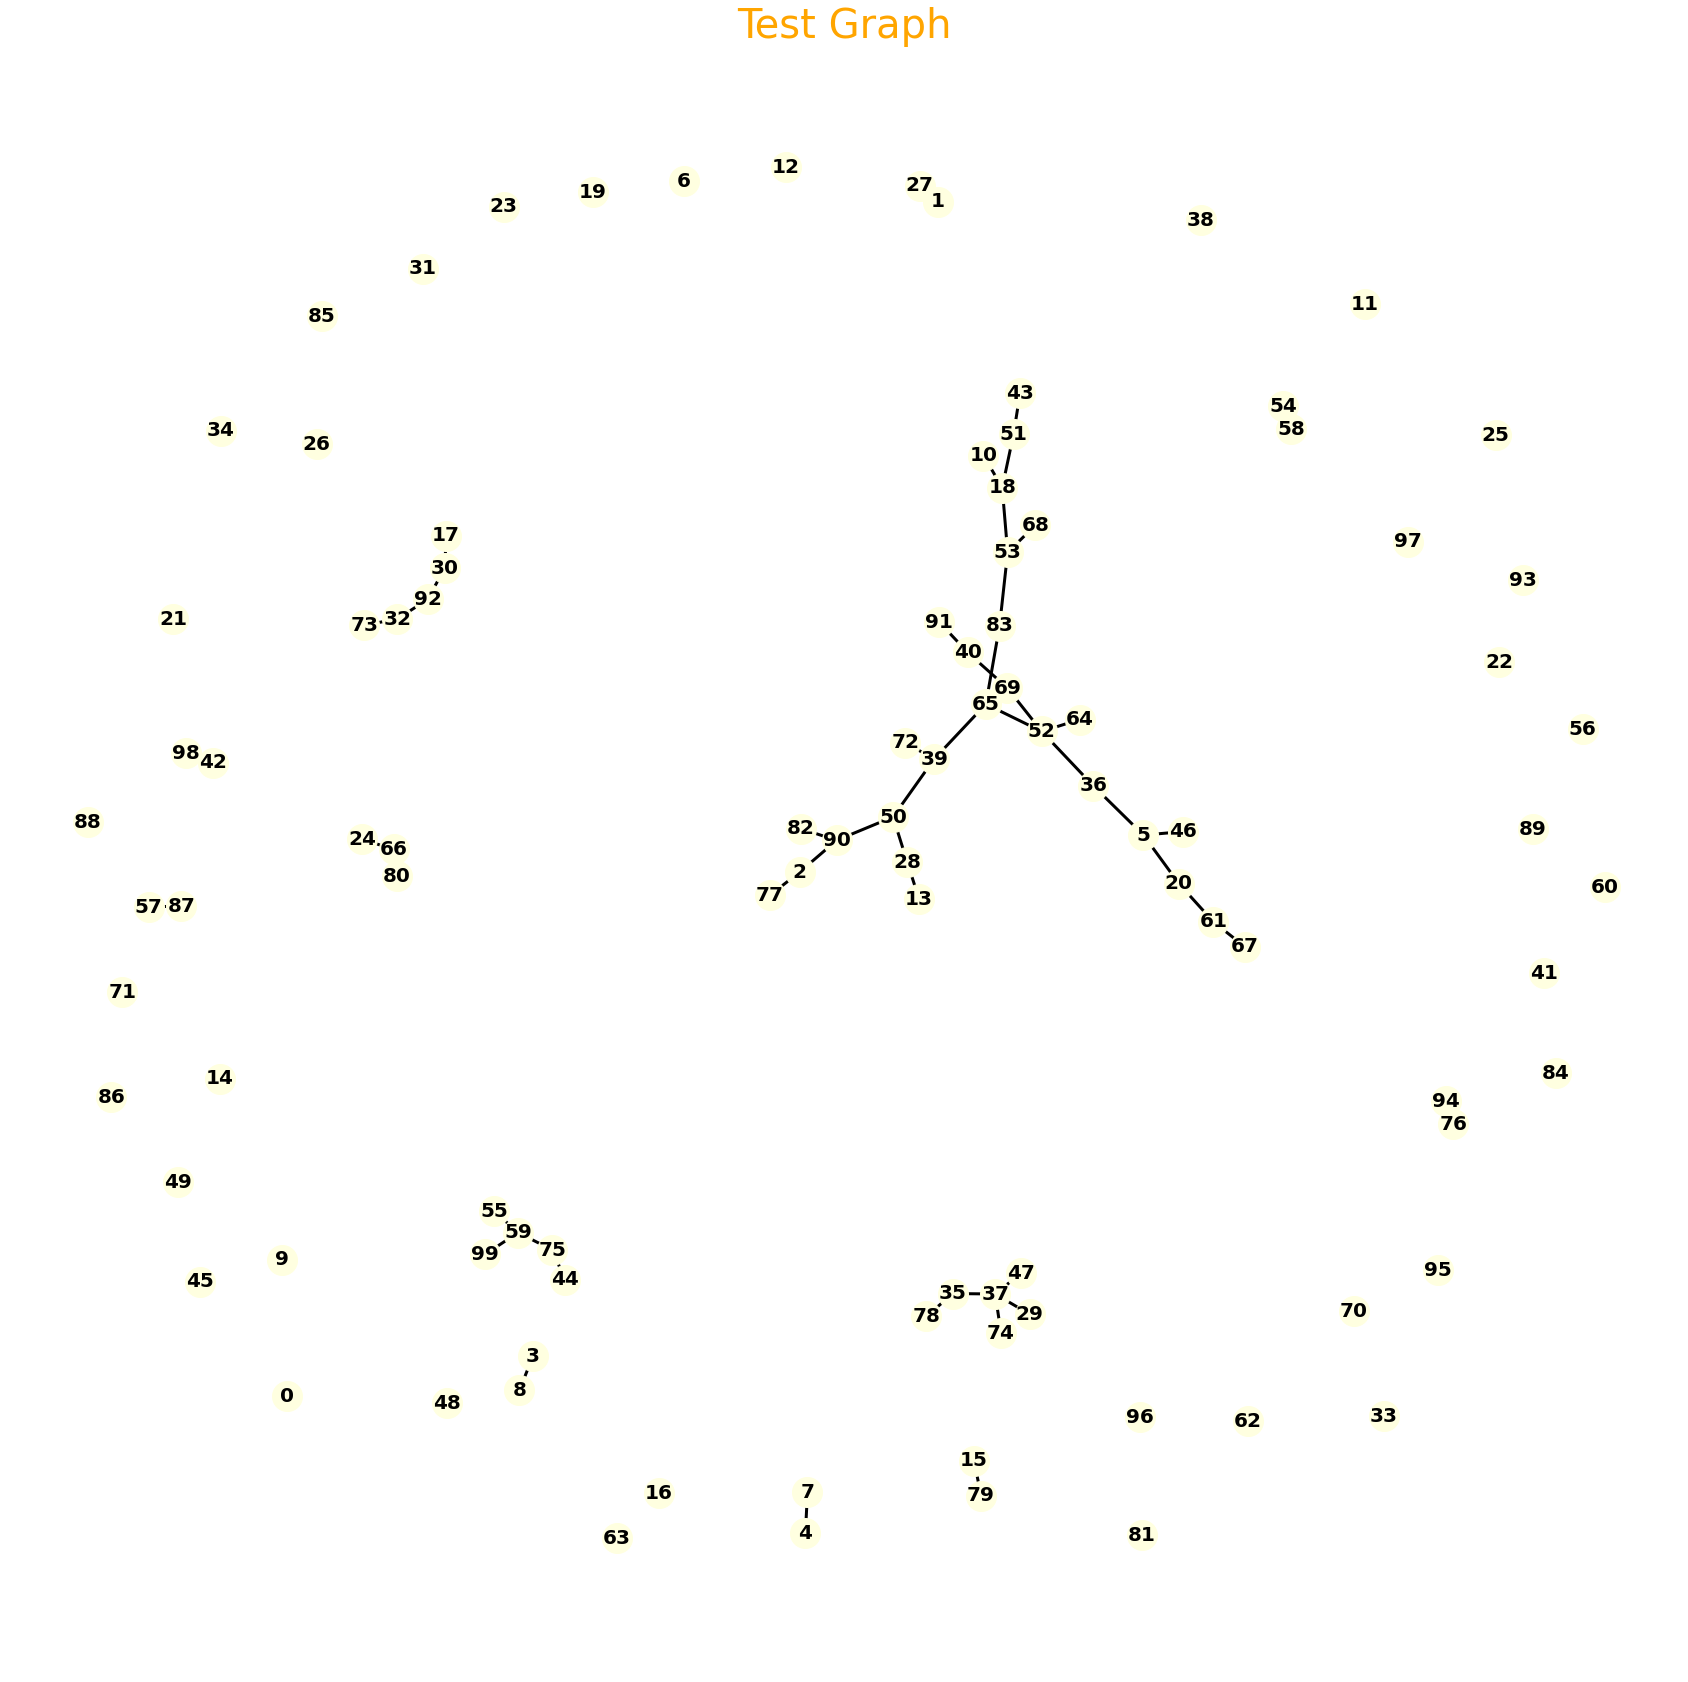

In [47]:
# number of nodes G, created just so we can visualize the graph 
n = 100
nodes = [n for n in range(n)]  
RequiredNodePointer = 27

# number of edges in G
m = 50

# generate the desired number of edges
all_edges = [(i, j) for i in range(n) for j in range(i + 1, n)]

# set a seed for consistent "random" sampling of the edge list
random.seed(604)
edge_list = random.sample(all_edges, m)
print(f"\t\tThe Edges to add to the graph:\n{edge_list}")

# generate a graph for the edges
# set up empty graph object
toyG = nx.Graph()

# generate the graph based on the edges generated
generateGraph(toyG, nodes, edge_list)

# set up some visualization options for the plot
options = {
    'node_color': 'lightyellow',
    'node_size': 900,
    'width': 3,
    'with_labels':True, 
    'font_weight':"bold",
    'font_size':20,
}

# lets have a look...
showGraph(toyG, 111, options, title="Test Graph", fontdict={"size":40, "color":"orange"})

# <span style="color:green">Create the Forward-star adjacency list for the graph given by the edge_list above.</span>

In [48]:
# set the node whose pointer into the edge list we would like to retrieve
requestedNode = 27

# call method to generate a sorted list of the edges based on outgoing edges
edges_sortedF, pointersF = forwardStarGB(n, edge_list)
print("forward star:")
print(f"Forward Sorted Edges:\n{edges_sortedF}\n\n")
print(f"Pointer array:\n{pointersF}\n{len(pointersF)}\n")

# get the pointer to the start of this nodes outgoing edges
node27pointerF = pointersF[requestedNode]
print(f"Thing: {node27pointerF}")
print(f"82: {pointersF[82]}")
# print the Nodes index/pointer into the edge list if it exists
# otherwise print a message saying this node does not have any 
# outgoing edges since it still has a nan value from the algorithm
if np.isnan(node27pointerF):
    print("Node 27 has not outgoing edges!!!")
    print("Thus, its pointer in the list is nan as a sentinel to indicate this condition")
else:
    print(f"Node 27s pointer into the edge list is index: {node27pointerF}")

82
forward star:
Forward Sorted Edges:
[(1, 27), (2, 77), (2, 90), (3, 8), (4, 7), (5, 46), (5, 36), (5, 20), (10, 18), (13, 28), (15, 79), (17, 30), (18, 51), (18, 53), (20, 61), (24, 66), (28, 50), (29, 37), (30, 92), (32, 92), (32, 73), (35, 37), (35, 78), (36, 52), (37, 47), (37, 74), (39, 72), (39, 50), (39, 65), (40, 91), (40, 69), (42, 98), (43, 51), (44, 75), (50, 90), (52, 69), (52, 64), (52, 65), (53, 68), (53, 83), (54, 58), (55, 59), (57, 87), (59, 75), (59, 99), (61, 67), (65, 83), (66, 80), (76, 94), (82, 90)]


Pointer array:
[0.0, 0.0, 1.0, 3.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 8.0, 8.0, 8.0, 9.0, 9.0, 10.0, 10.0, 11.0, 12.0, 12.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 16.0, 17.0, 18.0, 18.0, 19.0, 19.0, 19.0, 21.0, 23.0, 24.0, 24.0, 26.0, 29.0, 29.0, 31.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 34.0, 34.0, 35.0, 38.0, 40.0, 41.0, 41.0, 42.0, 42.0, 43.0, 43.0, 45.0, 45.0, 45.0, 45.0, 46.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 48.0, 48.0,

In [ ]:
# attempt to pull the edges
getEdges()

In [27]:
l = np.array(list([0]*5))
l[0:2] = 2
l

array([2, 2, 0, 0, 0])

# <span style="color:purple">Create the Reverse-star adjacency list for the graph given by the edge_list above.</span>

In [52]:
# set the node whose pointer into the edge list we would like to retrieve
requestedNode = 27

edges_sortedR, pointersR = reverseStarGB(n, edge_list)
print("------------------------- Reverse star: -------------------------")
print(f"Forward Sorted Edges:\n{edges_sortedR}\n\n")
print(f"Pointer array:\n{pointersR}\n\n")
node27pointerR = pointersR[27]

if np.isnan(node27pointerR):
    print("Node 27 has not ingoing edges!!!")
    print("Thus, its pointer in the list is nan as a sentinel to indicate this condition")
else:
    print(f"Node 27s pointer into the edge list is index: {node27pointerR}")

99
------------------------- Reverse star: -------------------------
Forward Sorted Edges:
[(4, 7), (3, 8), (10, 18), (5, 20), (1, 27), (13, 28), (17, 30), (5, 36), (35, 37), (29, 37), (5, 46), (37, 47), (28, 50), (39, 50), (18, 51), (43, 51), (36, 52), (18, 53), (54, 58), (55, 59), (20, 61), (52, 64), (39, 65), (52, 65), (24, 66), (61, 67), (53, 68), (52, 69), (40, 69), (39, 72), (32, 73), (37, 74), (59, 75), (44, 75), (2, 77), (35, 78), (15, 79), (66, 80), (65, 83), (53, 83), (57, 87), (50, 90), (2, 90), (82, 90), (40, 91), (30, 92), (32, 92), (76, 94), (42, 98), (59, 99)]


Pointer array:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 11.0, 11.0, 11.0, 12.0, 14.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 19.0, 19.0, 20.0, 20.0, 20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 27.0, 27.0, 27.0, 29.0, 30.0, 31

In [ ]:
getEdges(edges_sorted, pointersR, 90)

In [ ]:
getEdges(edges_sorted, pointersR, 27)